#### **IMPORTANT** : **THE** **ORIGINAL** **DATASET** "**SKIN** **CANCER** **MNIST** : **HAM10000**" **HAS** **BEEN** **PREPROCESSED** **ALREADY** **IN** **THE** **JUPYTER** **NOTEBOOK** "**SKIN_CANCER_MNIST_HAM10000_EDA_DATAPREPROCESSING**.**ipynb**". 

##### **THE** **CSV** **FILE** **GENERATION** **OF** "**hmist_64_64_RGB**.**csv**" **WAS** **AN** **IMPORTANT** **STEP** **IN** **THE** **ABOVE** **MENTIONED** **JUPYTER**. **THIS** **CSV** **FILE** **CONTAINS** **THE** **RESHAPED** **PIXEL** **VALUES** **OF** **THE** **ORIGINAL** **DATASET**.


**ABSTARCT** : To build a simple CNN model by the technique of sequential modelling by the means of keras library.

To perform hyperparameter tuning by creating a kerasclassifier and by using the scikit learn library function of GridSearchCV

### **MODEL** **BUILDING** **AND** **VERIFICATION**

In [8]:
# importing all the important libraries for model building 
# I will be using the keras library in order to build my first iteration of the CNN model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D 
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import plot_model



#### **LOADING** **THE** **DATA**

#### **NOTE**: **I** **will** **be** **uploading** **the** **resized** **image** **dataset** (**64x64x3**) **for** **building** **the** **baseline** **Convolutional** **Neural** **Network** **model**.

In [7]:
 from google.colab import files 
  
  
uploaded = files.upload()

Saving hmnist_64_64_RBG.csv to hmnist_64_64_RBG.csv


#### **LOADING** **THE** **DATA** **IN** **A** **PANDAS** **DATAFRAME**

In [9]:
cnn_df = pd.read_csv('/content/hmnist_64_64_RBG.csv')

In [ ]:
cnn_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,191,152,194,191,153,195,192,149,192,194,151,188,193,149,182,193,150,181,195,154,185,195,156,189,203,164,196,206,166,203,209,165,201,211,166,206,209,165,206,203,...,202,167,183,199,159,175,189,141,148,184,131,136,180,128,136,179,127,141,176,129,149,175,127,145,179,136,157,182,146,164,185,154,180,186,156,184,182,152,173,2
1,24,13,23,24,14,28,37,24,46,61,44,70,90,66,97,111,83,118,127,98,129,144,112,141,161,131,159,169,138,165,171,135,159,173,135,156,178,138,164,178,...,176,132,147,163,121,129,143,96,96,129,89,90,111,76,74,92,60,64,69,46,56,44,27,43,30,16,34,27,14,30,26,15,29,27,15,28,24,13,25,2
2,185,129,140,192,136,151,198,142,156,198,140,154,199,141,158,199,141,159,205,147,162,205,151,167,208,154,171,207,147,161,204,146,153,207,154,161,209,156,163,210,...,199,156,175,190,147,171,194,154,183,197,152,172,175,129,140,160,117,132,163,127,141,161,128,140,161,128,144,155,122,139,152,120,138,144,113,123,115,81,84,2
3,24,11,19,36,19,30,64,38,50,91,60,71,111,71,87,130,91,106,150,114,129,160,116,124,167,110,111,168,100,101,176,110,116,184,131,144,191,141,152,191,...,154,124,138,143,111,126,129,100,111,102,74,80,94,73,86,74,47,61,52,32,45,33,17,25,28,13,19,27,13,17,27,13,16,25,12,16,24,9,14,2
4,138,94,117,158,113,138,178,133,161,191,143,172,202,150,173,212,160,185,216,162,191,222,175,209,227,183,219,229,183,216,232,188,221,234,193,222,234,191,218,235,...,221,169,202,226,167,201,226,164,197,224,176,203,224,178,206,222,181,206,213,170,191,200,155,177,187,148,164,164,128,140,140,106,118,108,77,92,67,40,55,2


In [10]:
# Checking the shape of the dataset
cnn_df.shape

(10015, 12289)

**NOTE** : It has a total of 10015 rows and 12289 columns in the dataset. This rows and columns are nothing but the pixel values of every resized image in the dataset.

#### **Dropping** **the** **column** "**label**".

In [11]:
# Dropping the 'label' column and then converting the dataframe into an array value
cnn_drop = cnn_df.drop("label", axis=1)


In [12]:
cnn_drop.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,191,152,194,191,153,195,192,149,192,194,151,188,193,149,182,193,150,181,195,154,185,195,156,189,203,164,196,206,166,203,209,165,201,211,166,206,209,165,206,203,...,179,202,167,183,199,159,175,189,141,148,184,131,136,180,128,136,179,127,141,176,129,149,175,127,145,179,136,157,182,146,164,185,154,180,186,156,184,182,152,173
1,24,13,23,24,14,28,37,24,46,61,44,70,90,66,97,111,83,118,127,98,129,144,112,141,161,131,159,169,138,165,171,135,159,173,135,156,178,138,164,178,...,159,176,132,147,163,121,129,143,96,96,129,89,90,111,76,74,92,60,64,69,46,56,44,27,43,30,16,34,27,14,30,26,15,29,27,15,28,24,13,25
2,185,129,140,192,136,151,198,142,156,198,140,154,199,141,158,199,141,159,205,147,162,205,151,167,208,154,171,207,147,161,204,146,153,207,154,161,209,156,163,210,...,179,199,156,175,190,147,171,194,154,183,197,152,172,175,129,140,160,117,132,163,127,141,161,128,140,161,128,144,155,122,139,152,120,138,144,113,123,115,81,84
3,24,11,19,36,19,30,64,38,50,91,60,71,111,71,87,130,91,106,150,114,129,160,116,124,167,110,111,168,100,101,176,110,116,184,131,144,191,141,152,191,...,162,154,124,138,143,111,126,129,100,111,102,74,80,94,73,86,74,47,61,52,32,45,33,17,25,28,13,19,27,13,17,27,13,16,25,12,16,24,9,14
4,138,94,117,158,113,138,178,133,161,191,143,172,202,150,173,212,160,185,216,162,191,222,175,209,227,183,219,229,183,216,232,188,221,234,193,222,234,191,218,235,...,209,221,169,202,226,167,201,226,164,197,224,176,203,224,178,206,222,181,206,213,170,191,200,155,177,187,148,164,164,128,140,140,106,118,108,77,92,67,40,55


In [13]:
X = cnn_drop.to_numpy()

In [14]:
# Checking the shape of the array
X.shape

(10015, 12288)

**NOTE** : The array 'X' has a total of 10015 rows and 12288 columns.

In [15]:
# Storing the 'label' column values in a different variable i.e. 'label'
label = cnn_df["label"].values

In [16]:
# Checking the shape of 'label' column
label.shape

(10015,)

**NOTE** : One can say that 'label' consists of all 10015 rows of the dataset and since its a single column, the column count value is not highlighted.

### **DATA** **PREPROCESSING**

##### **SCALING** **AND** **SPLITTING** **THE** **DATA** **INTO** **TRAIN** **TEST** **AND** **VALIDATION** **DATASETS** **FOR** **FURTHER** **MODEL** **CREATION**

In [17]:
# Scaling (normalization) of the dataset
X_mean = np.mean(X) # calculating the mean of the numpy array
X_std = np.std(X) # Calculating the standard deviation of the numpy array

X = (X - X_mean)/X_std # Standardizing/ Normalizing the numpy array

In [18]:
# Splitting the data into train and test sets

# Here I will be considering the entire dataset as the training data hence taking the complete dataset 'X' into consideration
# Also only 10% of the dataset will be used as the testing dataset. Hence the test_size has been mentioned as 0.1 and a random state of '0' in order to 
# to avoid random splitting of the dataset.

X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, label, test_size=0.1,random_state=0)



In [19]:
# Checking the shape of the two splits

X_train_orig.shape, X_test.shape, y_train_orig.shape, y_test.shape

((9013, 12288), (1002, 12288), (9013,), (1002,))

In [20]:
# Splitting the data into train and validation dataset from already splitted train dataset in the previous set

# Here I will be considering 20% of the data as the validation set data hence, the test size is set to 0.2, with a random state of 1.

X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=1)

In [21]:
# Checking the shape of final train and validation sets

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7210, 12288), (1803, 12288), (7210,), (1803,))

**NOTE** : From the above command, the exact shape of the train,test,validation dataset confirms that there are 7210 rows and 12288 columns in the input training dataset, 1803 rows in the input validation set and 12288 columns and finally 7210 rows and 1803 rows in the output validation dataset.

#### **RESHAPING** **THE** **DATA** **TO** **BUILD** **THE** **MODEL** **FURTHER**

In [22]:
X_train = X_train.reshape(X_train.shape[0], *(64, 64, 3))
X_val = X_val.reshape(X_val.shape[0], *(64, 64, 3))
X_test = X_test.reshape(X_test.shape[0], *(64, 64, 3))


In [23]:
# checking the shape of each input training,validation and test datasets
X_train.shape, X_val.shape, X_test.shape

((7210, 64, 64, 3), (1803, 64, 64, 3), (1002, 64, 64, 3))

**NOTE** : One can see that the dataset has been reshaped in the form of 64x64x3 where 64x64 is the pixel size and 3 is the RGB information.

In [24]:
# checking the shape of the output training dataset
y_train.shape

(7210,)

**NOTE** : The output training set consists a total of 7210 rows and just a single column.

In [25]:
# Changing the output training, validation and test set data into matrix form
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [26]:
# Checking the shape of output training, testing and validation datasets

y_train.shape, y_val.shape, y_test.shape

((7210, 7), (1803, 7), (1002, 7))

**NOTE** : Finally the output training, validation and test datasets consists of 7210 rows, 1803 rows, 1002 rows respectively with every dataset consisting of 7 columns each.

###**TO** **BUILD** **THE** **CNN** **MODEL**

### **Steps** **involved** **to** **create** **a** **CNN** **model** **are** **as** **follows** :

**NOTE** : I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

**Q**. Why I used the Keras Sequential API?

Ans : To answer this question, Keras Sequential API is the most popular, highest level API which is extremely simple, concise and readable. It has a simple network which is easy to debug as well.

The basic architecture of a CNN consists of the following :

- The first is the **convolutional** (**Conv2D**) **layer**. It is like a set of learnable filters. I chose to set **16** filters for the  first conv2D layer, **32** filters for the second conv2D layer and **64** filters for the  last one.

- Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. 

- The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

- The second important layer in CNN is the **pooling** (**MaxPool2D**) **layer**. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting.

- We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is **high**, more the downsampling is important.

- Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

- **Dropout** is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

- '**relu**' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

- The **Flatten** layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

- In the end i used the features in a fully-connected (Dense) layer which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.


In [27]:
#Importing the KerasClassifier from the scikit learn wrapper class
from keras.wrappers.scikit_learn import KerasClassifier


In [28]:

  
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
input_shape = (64,64,3)
num_classes = 7

model = Sequential()

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(MaxPool2D(pool_size = (2, 2)))


# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size = (2, 2)))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='Same'))
model.add(MaxPool2D(pool_size= (2, 2)))

# Flatten feature map to a 1-dim tensor
model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units (neurons)
model.add(Dense(512, activation='relu'))

# Add a dropout rate of 0.5
model.add(Dropout(0.5))

# Adding the output layer with the sigmoid function for classification
model.add(Dense(num_classes, activation='softmax'))

# Adding the summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

#### **SETTING** **THE** **OPTIMIZER** 

Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm. We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy". The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons) in order to minimise the loss.

I chose Adam optimizer because it combines the advantages of two other extensions of stochastic gradient descent. 

Specifically:

Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

In [29]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [30]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

### **DATA** **AUGMENTATION**

- It is the optional step. In order to avoid overfitting problem, we need to expand artificially our HAM 10000 dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations

- Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

- By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [31]:
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [32]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

**MODEL** **FITTING**

This step finally I fit the model into x_train, y_train. In this step I have choosen batch size of 10 and 50 epochs as small as your batch size will be more efficiently your model will train and I have choosen 50 epochs to give the model sufficient epochs to train.

In [33]:
batch_size = 64
epochs = 30
history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
112/112 [==============================] - 39s 348ms/step - loss: 1.0125 - accuracy: 0.6576 - val_loss: 0.8982 - val_accuracy: 0.6622
Epoch 2/30
112/112 [==============================] - 39s 345ms/step - loss: 0.8599 - accuracy: 0.6847 - val_loss: 0.8468 - val_accuracy: 0.7060
Epoch 3/30
112/112 [==============================] - 39s 347ms/step - loss: 0.8050 - accuracy: 0.7022 - val_loss: 0.8079 - val_accuracy: 0.7105
Epoch 4/30
112/112 [==============================] - 39s 344ms/step - loss: 0.7718 - accuracy: 0.7154 - val_loss: 0.7396 - val_accuracy: 0.7221
Epoch 5/30
112/112 [==============================] - 39s 345ms/step - loss: 0.7507 - accuracy: 0.7257 - val_loss: 0.7750 - val_accuracy: 0.6983
Epoch 6/30
112/112 [==============================] - 39s 345ms/step - loss: 0.7429 - accuracy: 0.7235 - val_loss: 0.7349 - val_accuracy: 0.7188
Epoch 7/30
112/112 [==============================] - 

**NOTE** : From the above observations, one can say that the convolutional neural network training set accuracy is equal to 78.41% at the epoch of 30, which is good enough training set accuracy but can be improved by tuning the hyperparameters.

## **MODEL** **EVALUATION**

**NOTE** : Now lets evaluate the model by checking the test and validation set accuracies.

In [34]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))
model.save("model.h5")

57/57 [==============================] - 2s 43ms/step - loss: 0.6301 - accuracy: 0.7671
Validation: accuracy = 0.767055  ;  loss_v = 0.630088
Test: accuracy = 0.760479  ;  loss = 0.660926


**NOTE** : From the above model evaluation code, one can observe that the test set accuracy is equal to 76.6467% and the validation set accuracy is equal to 77.5929% which signifies that the model is performing good enough.

#### **TO** **PLOT** **MODEL** **PERFORMANCE**

In [35]:
# To import matplotlib library
import matplotlib.pyplot as plt
import itertools

In [36]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


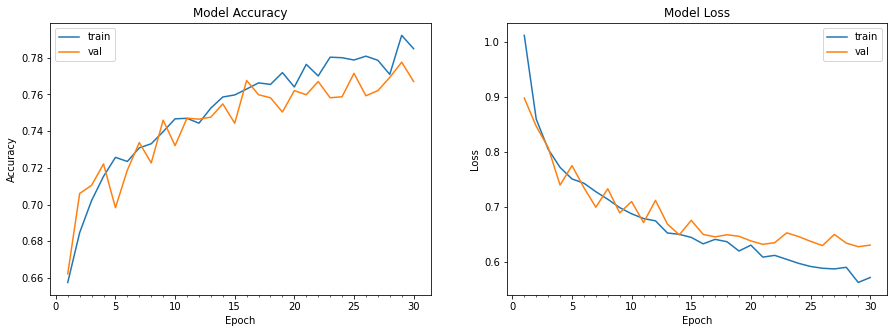

In [37]:
plot_model_history(history)

NOTE : One can see from the above plot that the training set accuracy of the model is higher than the validation set accuracy.

Also one can notice that the training set loss of the model is lesser than the testing set loss of the model.

In [38]:
from sklearn.metrics import confusion_matrix
import itertools

#### **HYPERPARAMETER** **TUNING**

#### **What** **do** **you** **mean** **by** **hyperparameter** **tuning**?

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

**I** **will** **use** **grid** **search** **in** **scikit**-**learn** **library** **to** **tune** **the** **hyperparameters** **of** **my** **deep** **convolutional** **neural** **network** (**DCNN**).



The hyperparameters for my model are as follows :

1. batch_size
2. epochs
3. lr (learning rate)
4. optimizer
5. activation
6. Dropout (dropout regularization)
7. kernel_initializer

In [ ]:
# Initializing the grid search function in scikit learn library
# Importing GriDSearch from scikit-learn
from sklearn.model_selection import GridSearchCV

In [ ]:
# Importing the KerasClassifier class from the scikit-learn library
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Building the model architecture again with the same number of layers again in order to wrap the keras classifier in the scikit learn library
def create_model():

  input_shape = (64,64,3)
  num_classes = 7
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='Same'))
  model.add(MaxPool2D(pool_size= (2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

   

  

In [ ]:
import numpy

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

  


In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
X_train.shape, y_train.shape

((7210, 64, 64, 3), (7210, 7))

In [ ]:
# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
param_grid = {'batch_size': [10, 20, 30], 'epochs' : [10,25,40]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)


In [ ]:
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params):   
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752565 using {'batch_size': 30, 'epochs': 10}
0.739528 (0.005049) with: {'batch_size': 10, 'epochs': 10}
0.726907 (0.005519) with: {'batch_size': 10, 'epochs': 25}
0.729542 (0.006355) with: {'batch_size': 10, 'epochs': 40}
0.740082 (0.011134) with: {'batch_size': 20, 'epochs': 10}
0.730098 (0.002714) with: {'batch_size': 20, 'epochs': 25}
0.727181 (0.019169) with: {'batch_size': 20, 'epochs': 40}
0.752565 (0.004244) with: {'batch_size': 30, 'epochs': 10}
0.749097 (0.008950) with: {'batch_size': 30, 'epochs': 25}
0.735643 (0.012216) with: {'batch_size': 30, 'epochs': 40}


**NOTE** : From the above hyperparameter tuning algorithm, one can see that the batch_size was given the values as 10, 20. 30, while the epoch values were given as 10, 25, 40 from which the best efficiency of the model was achieved at a batch size of 30 and epoch value as 10 and which was 75.25% accuracy.

But one can also notice that the model which was trained with an epoch value of 30 and batch size of 64 gave higher accuracy of 77.85% as compared to the model which was found as the best performing model from hyperparameter tuning. Hence considering the previous model as our final model for further analysis.

**PLOTTING** **THE** **CONFUSION** **MATRIX** **IN** **ORDER** **TO** **CHECK** **HOW** **ACCURATE** **ARE** **OUR** **PREDICTIONS** ARE

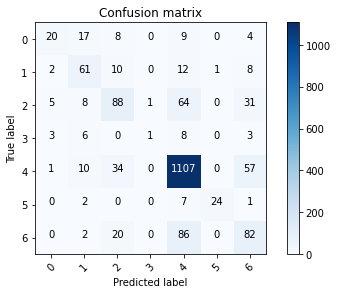

In [54]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
   

Text(0, 0.5, 'Fraction classified incorrectly')

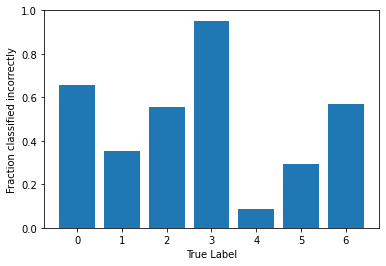

In [55]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

**CONCLUSION** : It seems our model has maximum number of incorrect predictions for Basal cell carcinoma which has code 3, then second most missclassified type is Vascular lesions code 5 then Melanocytic nevi code 0 where as Actinic keratoses code 4 has least misclassified type.

We can also further tune our model to easily achieve the accuracy above 80% and I think still this model is efficient in comparison to detection with human eyes having 77.0344% accuracy.



**CONTRIBUTION** : 

Code by self----70%

Code by reference----30%

**CITATIONS** :

SKIN CANCER MNIST DATASET KAGGLE: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

OVERVIEW OF IMAGE CLASSIFICATION USING CNN: https://analyticsindiamag.com/deep-learning-image-classification-with-cnn-an-overview/

GRIDSEARCHCV DOCUMENTATION : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

 **LICENSE** : 

Copyright 2019 Ria Rajput

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

